In [0]:
import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator 
from keras.applications.inception_v3 import InceptionV3 
from keras.layers import Dense, GlobalAveragePooling2D 
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Model 
from keras import optimizers 
import matplotlib.pyplot as plt 
%matplotlib inline
from keras.models import load_model

In [2]:
cd '/content/drive/My Drive/TEST1'

/content/drive/My Drive/TEST1


In [22]:
# create the base pre-trained model 
base_model = InceptionV3(weights='imagenet', include_top=False) 

# Get the output layer from the pre-trained Inception V3 model 
x = base_model.output 

# Now, add new layers that will be trained with our data 
# These layers will be randomly initialized 
x = GlobalAveragePooling2D()(x) 
x = Dense(64, activation='relu')(x) 
predictions = Dense(2, activation='softmax')(x) 

# Get the final Model to train 
model = Model(inputs=base_model.input, outputs=predictions) 

# Freeze the layers from the original base model so that we
# don't update the weights for layer in base_model.layers: 
model.trainable = False

adam = optimizers.adam(lr=0.01) 
# Compile the new model 
model.compile(optimizer=adam, loss='categorical_crossentropy', 
              metrics=['accuracy'])

#model.fit(X,Y,nb_epoch=5,batch_size=100,verbose=1)    

# load weights into new model
#loaded_model.load_weights("model.03-0.94.hdf5")
print("Loaded model from disk")
#model.summary()


Loaded model from disk


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255) 
train_dir = '/content/drive/My Drive/TEST1/' 
test_dir = '/content/drive/My Drive/TEST2/'

In [34]:
train_generator = train_datagen.flow_from_directory( train_dir,
  target_size=(299, 299), batch_size=1000, class_mode='categorical')

test_generator = test_datagen.flow_from_directory( test_dir,
  target_size=(299, 299), batch_size=1000, class_mode='categorical')

Found 500 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [0]:
base_model = InceptionV3(weights='imagenet', include_top=False)
#base_model.summary()

In [0]:
# Get the output layer from the pre-trained Inception V3 model 
x = base_model.output 

# Now, add new layers that will be trained with our data 
# These layers will be randomly initialized 
x = GlobalAveragePooling2D()(x) 
x = Dense(64, activation='relu')(x) 
predictions = Dense(2, activation='softmax')(x) 

# Get the final Model to train 
model = Model(inputs=base_model.input, outputs=predictions) 

# Freeze the layers from the original base model so that we
# don't update the weights for layer in base_model.layers: 
model.trainable = False

In [0]:
adam = optimizers.adam(lr=0.001) 
# Compile the new model 
model.compile(optimizer=adam, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
# Setup a callback to save the best model 
callbacks = [keras.callbacks.ModelCheckpoint(
  'model.{epoch:02d}-{val_accuracy:.2f}.hdf5', 
  monitor='val_accuracy', verbose=1, save_best_only=True, 
  mode='max', period=1)]

In [43]:
# Fit the data and output the history 
history = model.fit_generator(train_generator, verbose=1, 
  steps_per_epoch=len(train_generator), epochs=100,
  validation_data=test_generator,
  validation_steps=len(test_generator), callbacks=callbacks)

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.6872 - accuracy: 0.5380 - val_loss: 0.6551 - val_accuracy: 0.6667

Epoch 00001: val_accuracy improved from -inf to 0.66667, saving model to model.01-0.67.hdf5
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 0.6872 - accuracy: 0.5380 - val_loss: 0.6551 - val_accuracy: 0.6667

Epoch 00002: val_accuracy did not improve from 0.66667
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 0.6872 - accuracy: 0.5380 - val_loss: 0.6551 - val_accuracy: 0.6667

Epoch 00003: val_accuracy did not improve from 0.66667
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 0.6872 - accuracy: 0.5380 - val_loss: 0.6551 - val_accuracy: 0.6667

Epoch 00004: val_accuracy did not improve from 0.66667
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 0.6872 - accuracy: 0.5380 - val_loss: 0.6551 - val_accuracy: 0.6667

Epoch 00005: val_accuracy did not improve from 0

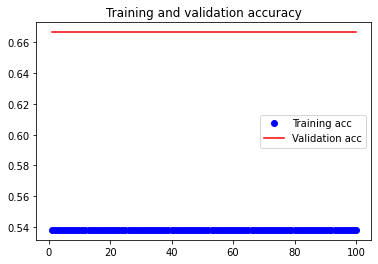

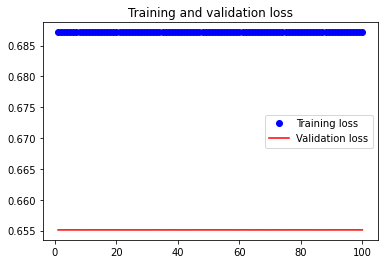

In [44]:
def plot_history(history): 
    acc = history.history['accuracy'] 
    val_acc = history.history['val_accuracy'] 
    loss = history.history['loss'] 
    val_loss = history.history['val_loss'] 
    epochs = range(1, len(acc) + 1) 
    
    plt.figure() 
    plt.title('Training and validation accuracy') 
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', color='red', \
      label='Validation acc') 
    plt.legend() 
    plt.show() 
   
    plt.figure() 
    plt.title('Training and validation loss')
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', color='red', \
      label='Validation loss') 
    plt.legend() 
    plt.show() 
    return acc, val_acc, loss, val_loss 

acc, val_acc, loss, val_loss = plot_history(history)

In [45]:
cd '/content/drive/My Drive/TEST1'

/content/drive/My Drive/TEST1


In [57]:
model = load_model('model.03-0.94.hdf5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [75]:
model = load_model('model.01-0.67.hdf5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [0]:
# Utility functions
classes = ['CNV',  'NORMAL']
# Preprocess the input
# Rescale the values to the same range that was used during training 
def preprocess_input(x):
    x = img_to_array(x) / 255.
    return np.expand_dims(x, axis=0) 

# Prediction for an image path in the local directory
def predict_from_image_path(image_path):
    return predict_image(load_img(image_path, target_size=(299, 299)))

# Prediction for an image URL path
def predict_from_image_url(image_url):
    res = requests.get(image_url)
    im = Image.open(BytesIO(res.content))
    return predict_from_image_path(im.fp)
    
# Predict an image
def predict_image(im):
    x = preprocess_input(im)
    pred = np.argmax(model.predict(x))
    return pred, classes[pred]

In [73]:
print(predict_from_image_path('/content/drive/My Drive/TEST2/CNV/test2c.jpeg'))
#grad_CAM('/content/drive/My Drive/TEST2/CNV/test2d.jpeg')

(0, 'CNV')


In [77]:
print(predict_from_image_path('/content/drive/My Drive/TRAIN1/CNV/CNV-13823-1.jpeg'))

(0, 'CNV')


In [79]:
print(predict_from_image_path('/content/drive/My Drive/TRAIN1/CNV/Copy of NORMAL-98994-10.jpeg'))

(1, 'NORMAL')
